In [1]:
import matplotlib.pyplot as plt
from torchvision.transforms import v2
from PIL import Image

## Download dataset

In [2]:
!gdown --id 1PdWkZe8Vt6xdsTj8KeqxhAd5Tmx4pyNh

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1PdWkZe8Vt6xdsTj8KeqxhAd5Tmx4pyNh
From (redirected): https://drive.google.com/uc?id=1PdWkZe8Vt6xdsTj8KeqxhAd5Tmx4pyNh&confirm=t&uuid=4911fa2a-e26b-4ba1-82c4-7312f8421166
To: /content/wb_recognition_dataset.zip
100% 105M/105M [00:01<00:00, 54.0MB/s]


## Extract data

In [3]:
!unzip /content/wb_recognition_dataset.zip &> /dev/null

## Experimenting augmentation methods

In [4]:
def display_image(images, titles=None, figsize=(10, 5), ncols=5):
  fig, axes = plt.subplots(1, ncols, figsize=figsize)

  for i, (image, title, ax) in enumerate(zip(images, titles, axes)):
    ax.imshow(image)
    if title:
      ax.set_title(title, fontsize=10)
    ax.axis('off')

  plt.tight_layout()
  plt.show()

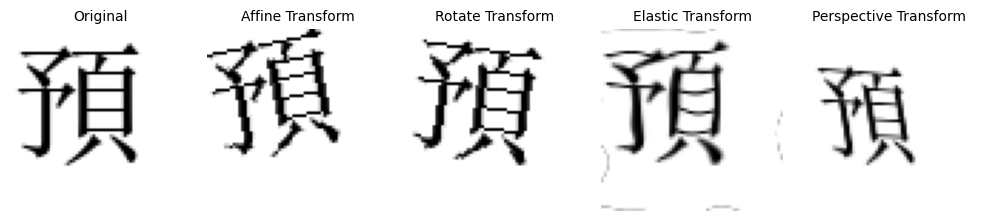

In [7]:
# select a random image from the dataset
img = Image.open('/content/wb_recognition_dataset/train/1466/46_1466.png')

img_width, img_height = img.size

# pad image with white pixels if shape is not square
if img_width < 20 or img_height < 20:
  img = v2.Resize(size=(32,32))(img)

# random affine transform with rotation = (-20,20), translation = (0,0.1), scale = (0.95,1)
affine_transfomer = v2.RandomAffine(degrees=(-20, 20), translate=(0, 0.1), scale=(0.95, 1), fill=255)
affine_imgs = [affine_transfomer(img) for _ in range(1)]

# random rotation with angle = (-10,10)
rotater = v2.RandomRotation(degrees=(-10, 10), fill=255)
rotated_imgs = [rotater(img) for _ in range(1)]

# random elastic transformation with alpha = 75
elastic_transformer = v2.ElasticTransform(fill=255, alpha=75)
transformed_imgs = [elastic_transformer(img) for _ in range(1)]

# random perspective transformatioon with distortion = 0.5, p = 1
perspective_transformer = v2.RandomPerspective(distortion_scale=0.5, p=1, fill=255)
perspective_imgs = [perspective_transformer(img) for _ in range(1)]

# display to compare the original image with the augmented images
aug_imgs = [img] + affine_imgs + rotated_imgs + transformed_imgs + perspective_imgs
display_image(aug_imgs, ["Original", "Affine Transform", "Rotate Transform", "Elastic Transform", "Perspective Transform"])